In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape      #checking shape of the data

(1470, 35)

In [5]:
df.describe()      #describing the dataset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.isnull().sum()          #checing for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.dtypes      #checking type og data

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
corr_mat = df.corr()           # correlating the data
corr_mat

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


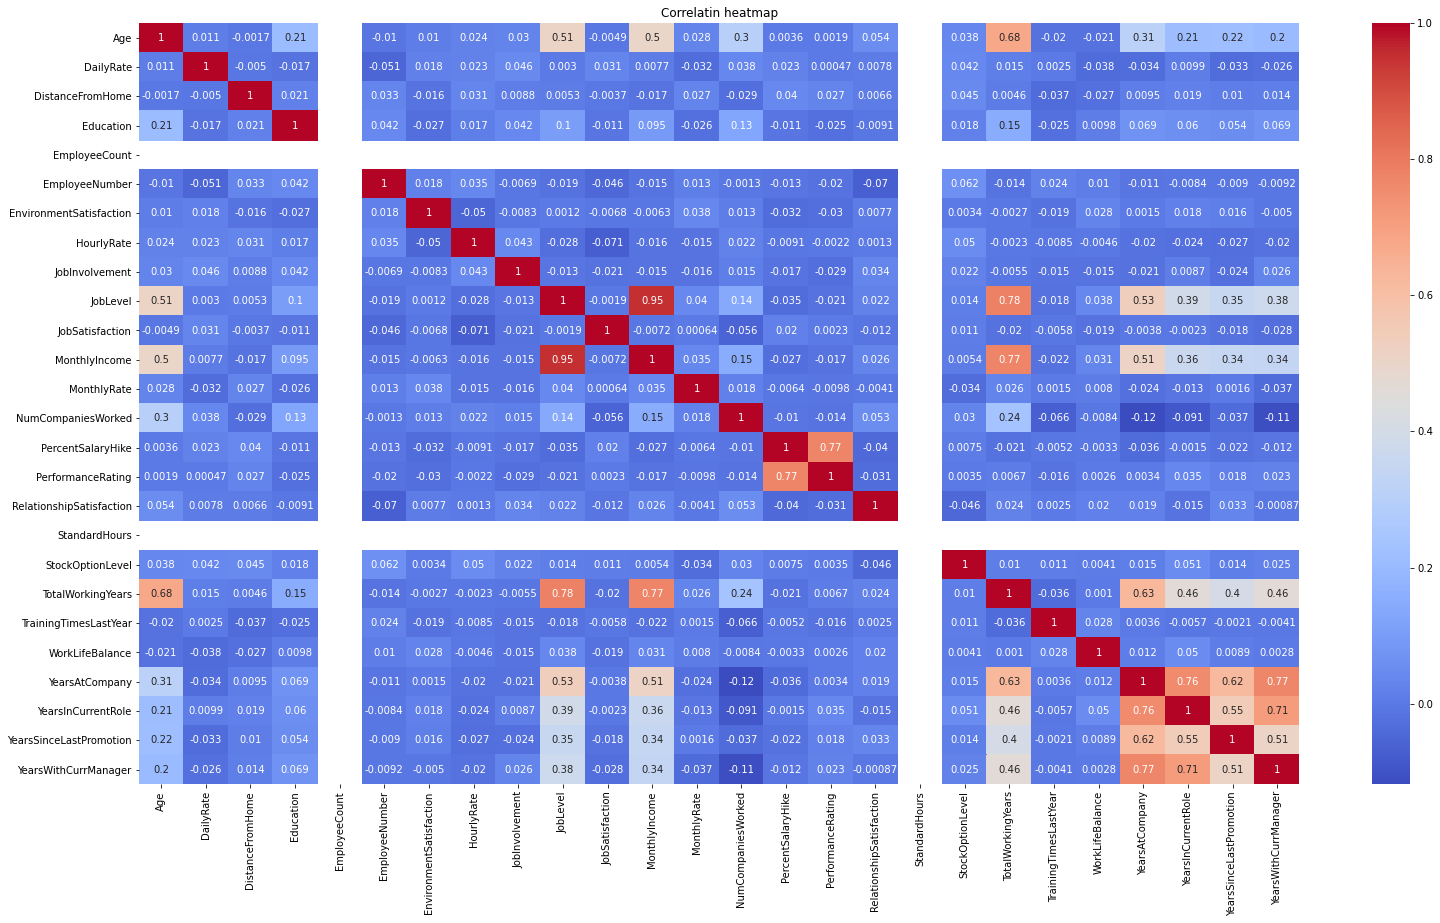

In [9]:
# ploting the heatmap for dataframe
plt.figure(figsize=[26,14])
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlatin heatmap')
plt.show()

In [10]:
df.drop('Over18',axis=1,inplace=True) # dropping column because of uniqueness

In [11]:
df.drop('EmployeeCount',axis=1,inplace=True) #dropping column

In [12]:
df.drop('StandardHours',axis=1,inplace=True)    #droopiing data

In [13]:
df.drop('EmployeeNumber',axis=1,inplace=True)      #dropping data

the abouve data was dropped because it will not helps in analysis because of their diffrent value for each employee

<AxesSubplot:xlabel='Attrition', ylabel='count'>

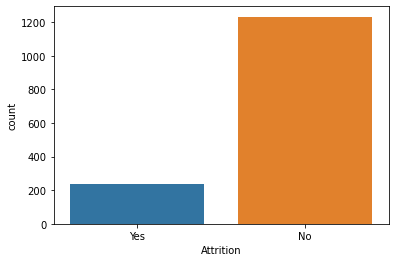

In [14]:
sns.countplot(x='Attrition',data=df)  #plotting the data

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

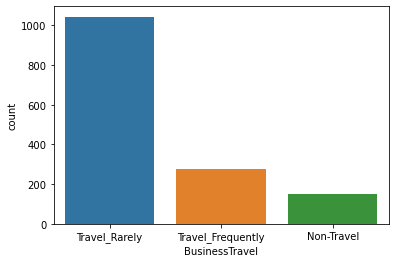

In [15]:
sns.countplot(x="BusinessTravel",data =df)

<AxesSubplot:xlabel='Department', ylabel='count'>

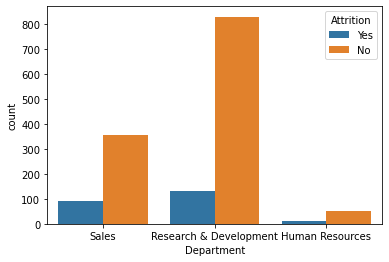

In [16]:
sns.countplot(x="Department",data =df,hue='Attrition')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

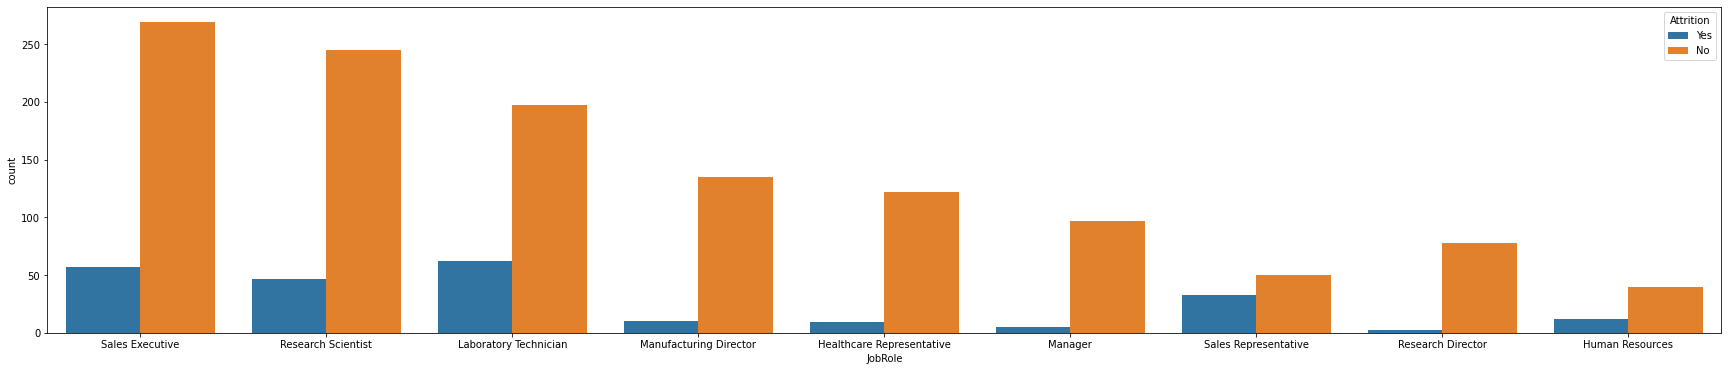

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(x="JobRole",data =df,hue='Attrition')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

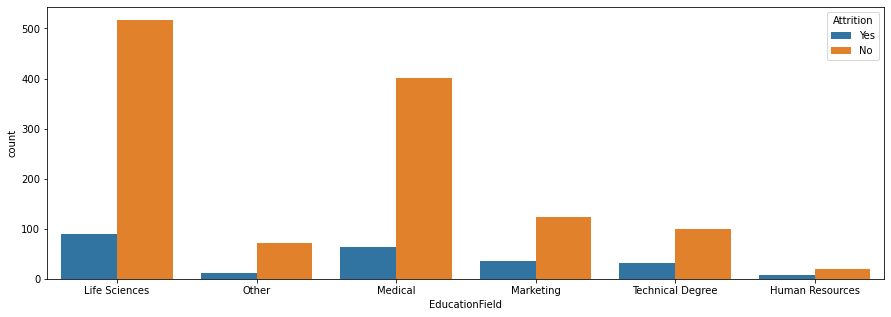

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x="EducationField",data =df,hue='Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

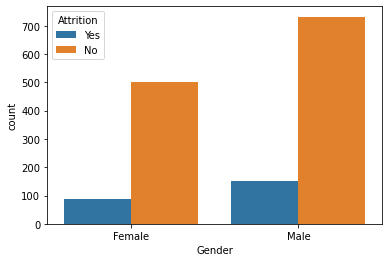

In [19]:
sns.countplot(x="Gender",data =df,hue='Attrition')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

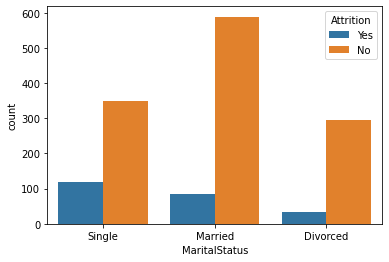

In [20]:
sns.countplot(x="MaritalStatus",data =df,hue='Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

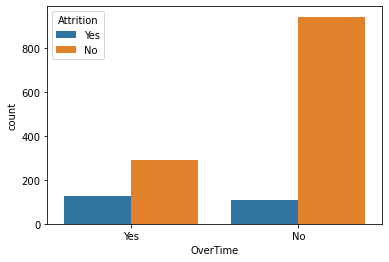

In [21]:
sns.countplot(x="OverTime",data =df,hue='Attrition')

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

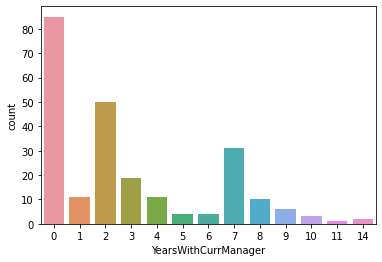

In [22]:
sns.countplot(x="YearsWithCurrManager",data =df.loc[df['Attrition']=="Yes"])

this data shows as the employees does'nt work with the manager longer

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

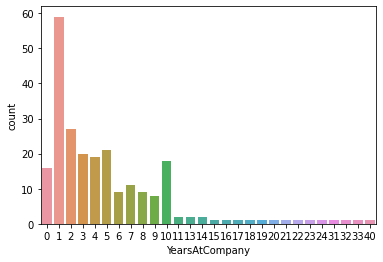

In [23]:
sns.countplot(x="YearsAtCompany",data =df.loc[df['Attrition']=="Yes"])

the data shows employees switch their company after some time 

In [24]:
df.skew()   #checking skewness

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [26]:
df.shape #checking shape of data

(1470, 31)

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EnvironmentSatisfaction        AxesSubplot(0.125,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
JobInvolvement              AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
JobLevel                    AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobSatisfaction                AxesSubplot(0.125,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
MonthlyRate                 AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
NumCompaniesWorked          AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
PercentSalaryHike              AxesSubplot(0.125,0.456463;0.1684

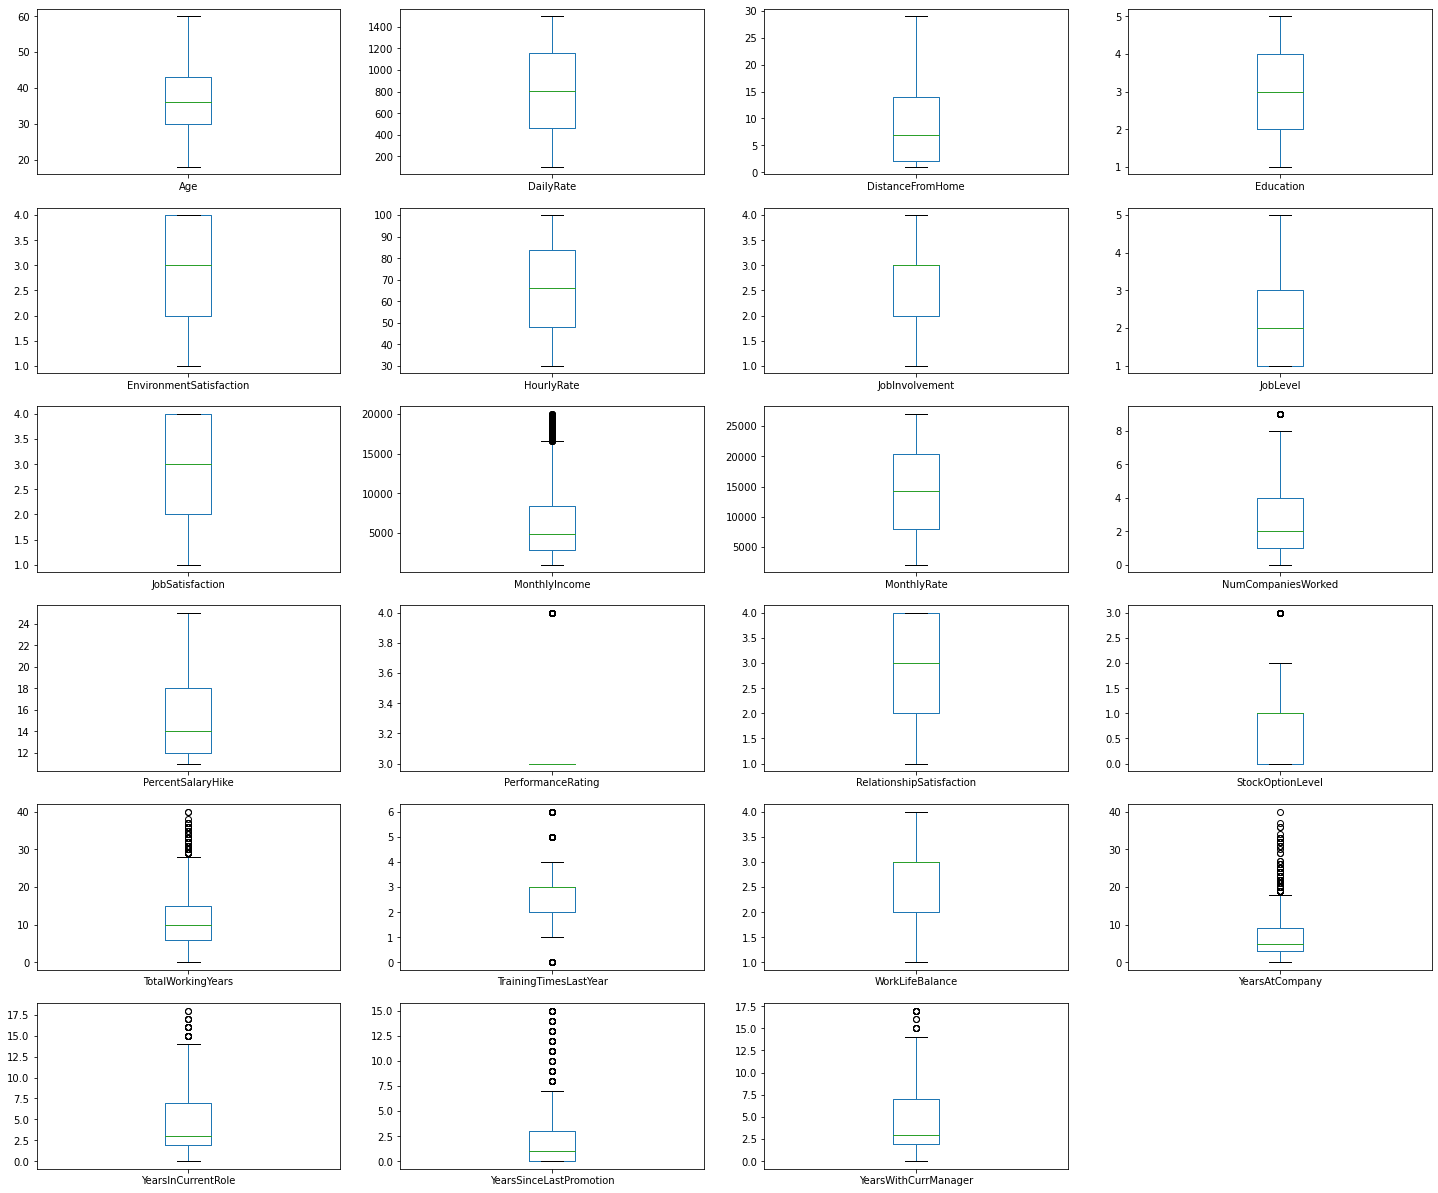

In [28]:
df.plot(kind='box',subplots=True,layout=(7,4),figsize=(25,25)) # plotting box plot

In [29]:
df['Gender'] = df['Gender'].replace({"Female":0,"Male":1 }) # replacing object into int

In [30]:
df["OverTime"] = df["OverTime"].replace({'No':0,'Yes':1})   # replacing object into int

In [31]:
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})  # replacing object into int

In [32]:
df['Department'] = df['Department'].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}) # replacing object into int

In [33]:
df.head()   #checking modified dataframe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,1102,0,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,No,2,279,1,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1,1373,1,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,No,2,1392,1,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,No,1,591,1,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


In [34]:
df.dtypes     #checking datatype

Age                          int64
Attrition                   object
BusinessTravel               int64
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [41]:
x = df.drop("Attrition",axis =1)
y = df['Attrition']

alloting diff entity to input and output

In [42]:
for i in x.columns:           #converting the object type into int
    if x[i].dtypes=="object":
        x[i]=enc.fit_transform(x[i].values.reshape(-1,1))

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()  #scalling the data
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [46]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()
le.fit(y)
y = le.transform(y)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [59]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.854875283446712
[[374   1]
 [ 63   3]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       375
           1       0.75      0.05      0.09        66

    accuracy                           0.85       441
   macro avg       0.80      0.52      0.50       441
weighted avg       0.84      0.85      0.80       441

